<a href="https://colab.research.google.com/github/QwejoD/Analyzing-borrowers-risk-of-defaulting/blob/main/Borrowers_risk_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing borrowers’ risk of defaulting

The purpose of the project is to prepare a report for a bank’s loan division. in order to do this, we will need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

The report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.



## Open the data file and have a look at the general information. 



In [1]:
# Loading all the libraries 
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
# Loading the data
data = pd.read_csv("/content/data.csv")
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan



In [3]:
#number rows and columns in the dataset

print(data.shape)



(21525, 12)


  12 columns and 21525 rows in the dataset

In [4]:
# first 5 rows of the dataset
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Looks like there are some negative values for the days_employed column

In [5]:
# Getting info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


There are some columns with missing values. aside the 'days_employed' column and 'total_income' column, the total number of non-null values in each column matches the total number of rows


In [6]:
#  the dataset with missing days_employed values

data[data.days_employed.isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [7]:
#shape of the dataset with missing days_employed value  dataframe
data[data.days_employed.isna()].shape

(2174, 12)

2174 rows of missing instances of days_employed values in the datafra`me

In [8]:
#  dataset with missing total_income values

data[data.total_income.isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [9]:
#shape of the dataset with missing days_employed value  dataframe

data[data.total_income.isna()].shape

(2174, 12)

In [10]:
# dataset where both days_employed and total_income values are missing .

data[data.days_employed.isna() & data.total_income.isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Instances of missing total_income values in the dataset is 2174, same as the days_employed column

In [11]:
# shape of dataset where both days_employed and total_income values are missing
missing_data =data[data.days_employed.isna() & data.total_income.isna()]
missing_data.shape

(2174, 12)

###Intermediate conclusion

The dataset contains a total of 21525 rows and 12 rows.
The day_employed column which represent the number of days a customer has been employed contains some negative values. 	It is impossible for number of days to be negative.

Aside the 'days_employed' column and 'total_income' column, the total number of non-null values in each column matches the total number of rows. some of the values in the days_emplyed and total_income column are missing

The number of rows for the missing dataframe matches the total number of missing values in both columns (days_employed and total_income).
Further investigation into the dataframe shows that rows with missing days_employed values also have missing total_income values. Both columns have 2174 missing values


In [12]:
# precentage of missing values compared to the whole dataset
rows_whole_dataset =data.shape[0]
rows_missing_dataset= missing_data.shape[0]
percentage = (rows_missing_dataset/rows_whole_dataset)*100
percentage

10.099883855981417

The percentage of missing data in the dataset is 10.0999% which cosiderably large to ignore

In [13]:
# investigating the dataframe for which for which total income and days employed are present 

# Dataset for clients with all columns filled 

not_missing_data = data[-data.days_employed.isna() & -data.total_income.isna()]

In [14]:
# unique columns in the not_missing_dataset
not_missing_data.columns.unique()

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [15]:
# unique columns in the missing_dataset
missing_data.columns.unique()

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [16]:
not_missing_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.537388,63046.497661,43.255336,0.819079,0.972249,0.081184,26787.568355
std,1.371408,140827.311974,12.579170,0.550104,1.420596,0.273125,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [17]:
# Checking the distribution in the whole dataset
data.describe()


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [18]:
data.describe(include="all")

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [19]:
not_missing_data.describe(include="all")

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,19351.000000,19351.000000,19351.000000,19351,19351.000000,19351,19351.000000,19351,19351,19351.000000,19351.000000,19351
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,12342,NaN,11143,NaN,12752,10014,NaN,NaN,721
mean,0.537388,63046.497661,43.255336,NaN,0.819079,NaN,0.972249,NaN,NaN,0.081184,26787.568355,NaN
std,1.371408,140827.311974,12.579170,NaN,0.550104,NaN,1.420596,NaN,NaN,0.273125,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [20]:
data.value_counts(normalize=True).to_frame().head()

0
children days_employed dob_years education           education_id family_status family_status_id gender income_type   debt total_income purpose                         
-1       -9851.184337  44        secondary education 1            divorced      3                F      employee      0    17758.530    to own a car            0.000052
 1       -7117.338200  42        secondary education 1            married       0                F      civil servant 0    36511.880    housing renovation      0.000052
         -7137.319761  35        secondary education 1            married       0                F      employee      0    20696.434    property                0.000052
         -7146.299384  50        bachelor's degree   0            married       0                F      employee      0    16782.180    housing transactions    0.000052
         -7152.420165  49        secondary education 1            married       0                F      employee      0    17529.023    building a real estate  0.000052

In [21]:
not_missing_data.value_counts(normalize=True).to_frame().head()

0
children days_employed dob_years education           education_id family_status family_status_id gender income_type   debt total_income purpose                         
-1       -9851.184337  44        secondary education 1            divorced      3                F      employee      0    17758.530    to own a car            0.000052
 1       -7117.338200  42        secondary education 1            married       0                F      civil servant 0    36511.880    housing renovation      0.000052
         -7137.319761  35        secondary education 1            married       0                F      employee      0    20696.434    property                0.000052
         -7146.299384  50        bachelor's degree   0            married       0                F      employee      0    16782.180    housing transactions    0.000052
         -7152.420165  49        secondary education 1            married       0                F      employee      0    17529.023    building a real estate  0.000052

In [22]:
cat_col = ['education', 'gender', 'income_type']     
for col in cat_col:
    display(data[col].value_counts(normalize=True))

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: education, dtype: float64

F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

In [23]:
cat_col = ['education', 'gender', 'income_type']     
for col in cat_col:
    display(not_missing_data[col].value_counts(normalize=True))


secondary education    0.637796
bachelor's degree      0.218180
SECONDARY EDUCATION    0.036432
Secondary Education    0.033383
some college           0.031678
BACHELOR'S DEGREE      0.012971
Bachelor's Degree      0.012557
primary education      0.011937
Some College           0.002067
SOME COLLEGE           0.001137
PRIMARY EDUCATION      0.000827
Primary Education      0.000723
graduate degree        0.000207
Graduate Degree        0.000052
GRADUATE DEGREE        0.000052
Name: education, dtype: float64

F      0.658984
M      0.340964
XNA    0.000052
Name: gender, dtype: float64

employee                       0.517493
business                       0.236525
retiree                        0.177924
civil servant                  0.067800
unemployed                     0.000103
student                        0.000052
entrepreneur                   0.000052
paternity / maternity leave    0.000052
Name: income_type, dtype: float64



**Intermediate conclusion**


Comparing the distributions of the original data and the filtered data (not_missing_data) using the describe() method:
1. The mean,standard deviation, min, max and all other attributes of both datasets is similar accross all columns 




2. The most frequent value in the education column in "data" is secondary education, this is the same case for the not_missing_data, though its frequency in each of the dataframes is diffrent, 13750 counts in the original data and 12342. This observation makes sense as the not_missing_data is a subset of data. The frequent values in all the columns in the data and not_missing_data is similar. But the how frequent they occur appears to be different.




3. The minimum value 'children' column, which represent the number of children in the family is -1. This is strange as there can't be negative number of children

4. The relative frequency of the values in the cartegorical columns seems to be similar with some little variations throughout the two tables (data and not_missing_data) 




The missing values in the days_employed and the total_income column seems to have little to no effect on the data.
However the exploration done so far isn't enough to come to this conclusion.


#### **Conclusions**

The missing data seems to be symmetric as days_employed and the total_income values seems to be missing together at the rows for which they are missing.
Since the distribution of the data is not much affected by the missing values, the missing values could be replaced with the mean or median in the respectiev columns but the various categories for which these values are missing needs further investigation in order to take action.

## More Exploration and Data transformation

Going through each column to see what issues we may have in them.

Investigating the `education` column

In [24]:
# taking a sample of the various values in the education column
data.education.sample(20)

20184    secondary education
2603     secondary education
14697      Bachelor's Degree
12244    secondary education
4389       BACHELOR'S DEGREE
14599    SECONDARY EDUCATION
13392    secondary education
16939    secondary education
20548    secondary education
16506    secondary education
15909    secondary education
12245      bachelor's degree
7677       bachelor's degree
13906    SECONDARY EDUCATION
20620    secondary education
10907    secondary education
18669    secondary education
12703    secondary education
3723     secondary education
19640    secondary education
Name: education, dtype: object

In [25]:
# All unique values in education column to check if and what spellings will need to be fixed
data.education.unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

The education column has implicit values. example,'PRIMARY EDUCATION' and 'primary education' have the same meaning but where entered has diffrent values. the values that confer same meaning needs to in the same format.

In [26]:
#All values in the education column changed to lowercase

data["education"] = data["education"].str.lower()

In [27]:
# Checking all the values in the column to make sure we fixed them
data.education.unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

 Investigating the data in the `children` column

In [28]:
# the distribution of values in the `children` column
data.children.describe()

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [29]:
#All unique values in the children column
data.children.unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

There are some negative values for number of children

In [30]:
(data.children < 0).sum()

47

47 customers have -1 children. quite strange. This might be due to entry mistakes 

In [31]:
# Percentage of customers with -1 children values
prob_percent = (data[data.children < 0].shape[0]/data.shape[0])*100
prob_percent

0.2183507549361208

The percentage of problematic data is about 0.22% which quite is low. since 0.2% might not have significant effect on the data, the rows with -1 children values will be set to zero(0)

In [32]:
#setting the -1 values in the children column to zero 
columns_to_replace = ['children']  
for column in columns_to_replace: 
    data[column] = data[column].replace(-1,0) 

In [33]:
data[data.children < 0].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [34]:
# Checking the `children` column again to make sure it's all fixed
data.children.describe()


count    21525.000000
mean         0.541092
std          1.379943
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

The -1 values in the children column have been set to zero 

In [35]:
data[data.children==20].shape[0]

76

In [36]:
data.children.value_counts()

0     14196
1      4818
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [37]:
(data[data.children==20].shape[0]/data.shape[0])*100

0.3530778164924506

About 0.35% of the clients have 20 children. This value is outrageously large just a client, let alone 76 of them. Hence the "20" values will be replaced with the most frequent value count in the column.
The most frequent value count in the column appears to be 1 with a value count of 4818.

In [38]:
# Replacing 20 with 1 in the children column of the dataset 

columns_to_replace = ['children']  
for column in columns_to_replace: 
    data[column] = data[column].replace(20,1) 

In [39]:
# checking to see if all 20 values have been replaced 
data.children.unique()

array([1, 0, 3, 2, 4, 5])

The output shows that there is no entry of  20 in the children column

##### Investigating the `days_employed`  

In [40]:
data.days_employed.describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

The days_employed column has some negative values 

In [41]:
data[data.days_employed <0].shape

(15906, 12)

In [42]:
prob_percentage_days = (data[data.days_employed <0].shape[0]/data.shape[0])*100
prob_percentage_days

73.89547038327527

There about 15906 instances of negatve values in the days employed column. Which represent 73.9% of the whole data. This could've been due to some technical issues, this might have occured if the days emplyed were converted from years to days. 

To address this, all negative values in the column days_employed will be turn to positive

In [43]:
# Addressing the problematic values
data.days_employed= data.days_employed.abs()

In [45]:
# Checking the result to make sure it's fixed
data.days_employed.describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

The minimum value in the column is now negative, thus all the negative values have been tranformed to positive


Calling the .decribe() method on the days_employed shows that its data type is float64. Since the number of days cannot be in decimal, this might mean that the number of days employed was property entered in number of minutes, hours or seconds. Or probably there was a mistake in converting that data to days

In [46]:
# creating a copy of the data for investigation 

data_2 = data.copy()

In [47]:
data_2

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [48]:
# creating another coumn for data_2 
# column will contain number of days in years 

data_2["years_employed"] = data_2['days_employed']/365

In [49]:
data_2.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,years_employed
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000,19351.000000
mean,0.474007,66914.728907,43.293380,0.817236,0.972544,0.080883,26787.568355,183.328024
std,0.750664,139030.880527,12.574584,0.548138,1.420324,0.272661,16475.450632,380.906522
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,3306.762000,0.066141
25%,0.000000,927.009265,33.000000,1.000000,0.000000,0.000000,16488.504500,2.539751
50%,0.000000,2194.220567,42.000000,1.000000,0.000000,0.000000,23202.870000,6.011563
75%,1.000000,5537.882441,53.000000,1.000000,1.000000,0.000000,32549.611000,15.172281
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000,1100.699727


In [50]:
data_2[data_2.years_employed > data_2.dob_years]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car,1096.660649
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate,927.539597
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate,996.023258
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate,919.401832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding,928.506483
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property,1058.897847
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions,992.222066
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car,1024.645783









There are about 3519 instances for which the number of years a client has been employed is greater than the clients age. The is quite outrageous.   

In [51]:
data_2["hours_employed"] = data_2['days_employed']

In [52]:
data_2['year2_employed'] =data_2["hours_employed"]/8760

In [53]:
data_2.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,years_employed,hours_employed,year2_employed
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.474007,66914.728907,43.293380,0.817236,0.972544,0.080883,26787.568355,183.328024,66914.728907,7.638668
std,0.750664,139030.880527,12.574584,0.548138,1.420324,0.272661,16475.450632,380.906522,139030.880527,15.871105
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,3306.762000,0.066141,24.141633,0.002756
25%,0.000000,927.009265,33.000000,1.000000,0.000000,0.000000,16488.504500,2.539751,927.009265,0.105823
50%,0.000000,2194.220567,42.000000,1.000000,0.000000,0.000000,23202.870000,6.011563,2194.220567,0.250482
75%,1.000000,5537.882441,53.000000,1.000000,1.000000,0.000000,32549.611000,15.172281,5537.882441,0.632178
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000,1100.699727,401755.400475,45.862489


Even after assuming the days_employed entry was provided in hours and converting this values to years. Its seems a large percentage of the clients have years employed less that 1. Also an impossible case considering the ages of most of the clients and their total income   

<div class="alert alert-block alert-info">
<b>Since dropping those values isnt advisable due to the large number of affected clients. Various cases where considered

1. By converting the number of days to years but still some clients ages are lesser than their days_emplyed 

    
2. Assumimg the original entries were probably in hours and converting the hours to years, it was realized that most clients have years_employed <1. A case that does not really make sense if we take their total income into consideration

<strong>The decision taken is to asssume the days employed are in hours for cases where days employed > dob years. Thus we will convert the number of days employed from hours to days for cases where day_employed > dob_years </strong>.</b> <a class="tocSkip"></a>
</div>

In [54]:
# extract all values where the years_employed is greater that Age
abnormal_hrs = data_2.loc[data_2.years_employed > data_2.dob_years, 'days_employed']

In [55]:
# Convert this values to days by dividing it by 24
data_2.loc[data_2.years_employed > data_2.dob_years, 'days_employed'] = abnormal_hrs/24

In [56]:
data_2

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,hours_employed,year2_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,8437.673028,0.963205
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,4024.803754,0.459452
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,5623.422610,0.641943
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,4124.747207,0.470862
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,340266.072047,38.843159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,4529.316663,0.517045
21521,0,14330.725172,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,343937.404131,39.262261
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,2113.346888,0.241250
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,3112.481705,0.355306


In [57]:
# column will contain number of days in years 

data_2["years_employed_update"] = data_2['days_employed']/365
data_2

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,hours_employed,year2_employed,years_employed_update
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,8437.673028,0.963205,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,4024.803754,0.459452,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,5623.422610,0.641943,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,4124.747207,0.470862,11.300677
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,340266.072047,38.843159,38.843159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,4529.316663,0.517045,12.409087
21521,0,14330.725172,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,343937.404131,39.262261,39.262261
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,2113.346888,0.241250,5.789991
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,3112.481705,0.355306,8.527347


In [58]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [59]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


#### Looking at the client's age by investigating the `dob_years` column

In [60]:
# Checking the `dob_years` for suspicious values
data.dob_years.describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Looks like some clients have zero ages

In [61]:
data[data.dob_years==0].shape

(101, 12)

In [62]:
# count the percentage
prob_dob = (data[data.dob_years==0].shape[0]/data.shape[0])*100
prob_dob

0.4692218350754936

About 0.5 percent of the customers are zero (0) years old, this is impossible as this would mean that the customers are babies.

In [63]:
# median of ages in the dataset
data.dob_years.median()

42.0

In [64]:
# replacing zero values in the dob_years column with the median value of the column
data.loc[data['dob_years']==0, 'dob_years'] = data.dob_years.median()

In [65]:
# verifying if the changes took effect 
data[data.dob_years==0].shape

(0, 12)

The shape output shows that there are no zero customers with 0 dob_years.

#### Investigating the `family_status` column

In [66]:
# Let's see the values for the column

data.family_status.unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [67]:
# Addressing the problematic values in `family_status`, by spliting 'widow / widower' into separate values

def split_family_status(row):
    value = row["family_status"]
    if value == 'widow / widower':
        if row["gender"] == "F":
            return "widow"
        if row["gender"] == "M":
            return "widower"
    return value
data['family_status']=data.apply(split_family_status, axis=1)

In [68]:
# Checking the result to make sure it's fixed
data.family_status.unique()

array(['married', 'civil partnership', 'widow', 'divorced', 'unmarried',
       'widower'], dtype=object)

Investigating the `gender` column. 

In [69]:
# Let's see the values in the column
data.gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [70]:
(data.gender =='XNA').sum()

1

In [71]:
# Address the problematic values
data[data.gender =='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [72]:
# Replacing XNA with unknown
columns_to_replace = ['gender']  
for column in columns_to_replace: 
    data[column] = data[column].replace('XNA','unknown') 

Just on customer has 'XNA' as gender value. droping this individual's entries 

In [73]:
# Dropping the row using the row's index

data[data.gender =='unknown']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,unknown,business,0,32624.825,buy real estate


<div class="alert alert-block alert-info">
<b>'XNA' in gender column replaced with unknown
.</b> <a class="tocSkip"></a>
</div>

In [74]:
# Check the result - make sure it's fixed

(data.gender =='XNA').sum()

0

Investigating the `income_type` column. 

In [75]:
# Let's see the description of values in the column
data['income_type'].describe()

count        21525
unique           8
top       employee
freq         11119
Name: income_type, dtype: object

In [76]:
# unique values in the column
data.income_type.unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [77]:
# Address the problematic values ('paternity / maternity leave') by splitting

def split_income_type(row):
    value = row["income_type"]
    if value == 'paternity / maternity leave':
        if row["gender"] == "F":
            return "maternity leave"
        if row["gender"] == "M":
            return "paternity leave"
    return value
data['income_type']=data.apply(split_income_type, axis=1)

In [78]:
# Check the result to make sure it's fixed

data.income_type.unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'maternity leave'], dtype=object)

Back to investigating the original data as a whole 

In [79]:
# Checking duplicates
data.duplicated().sum()


72

72 duplicated rows were recorded

In [80]:
# Addressing the duplicates by dropping
data = data.drop_duplicates(ignore_index=True)

In [81]:
# checking whether we have any duplicates
data.duplicated().sum()

0

In [82]:
# Checking the size of the dataset that you now have after your first manipulations with it
data.shape

(21453, 12)

In [83]:
print((1-(21452/21525))*100)

0.33914053426248314


##### The new dataset has 21453 rows and 12 columns. the number of entries has reduced by 0.34% 


# Handling missing values

In [84]:
# Finding the dictionaries
fs_ids = data[["family_status_id", "family_status"]].drop_duplicates()
family_status_ids = dict(fs_ids[["family_status_id", "family_status"]].values)
family_status_ids

{0: 'married',
 1: 'civil partnership',
 2: 'widower',
 3: 'divorced',
 4: 'unmarried'}

In [85]:
dict(data[["family_status_id", "family_status"]].drop_duplicates().values)

{0: 'married',
 1: 'civil partnership',
 2: 'widower',
 3: 'divorced',
 4: 'unmarried'}

In [86]:
ed_ids = data[["education_id", "education"]].drop_duplicates()
education_ids=dict(ed_ids[["education_id", "education"]].values)
education_ids

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

### Restoring missing values in `total_income`

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21453 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


The days_employed column and the total_income column have missing values 

In [88]:
# Let's write a function that calculates the age category

def func_age_category(age):
    if 0<=age<13:
        return "child"
    elif 13<=age<20:
        return "teenager"
    elif 20<=age <30:
        return "young adult"
    elif 30<=age<50:
        return "middle age adult"
    elif 50<=age<70:
        return "older adult"
    elif age > 70:
        return "senior citizen"
    else:
        return age

In [89]:
# Test if the function works
func_age_category(19)

'teenager'

In [90]:
pd.options.mode.chained_assignment = None

In [91]:
data['dob_years']

0        42
1        36
2        33
3        32
4        53
         ..
21448    43
21449    67
21450    38
21451    38
21452    40
Name: dob_years, Length: 21453, dtype: int64

In [92]:
# Creating new column based on function
data['age_category'] = data['dob_years'].apply(func_age_category)

#data['age_category']


In [93]:
# Checking how values in the new column

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,middle age adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,middle age adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,middle age adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,middle age adult
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,older adult


The age category column has been created 

In [94]:
# Looking at the mean values for income based on your identified factors
data.groupby('age_category')['total_income'].mean()

age_category
70                  20995.335629
middle age adult    28400.559157
older adult         24953.766431
senior citizen      19575.454327
teenager            16993.942462
young adult         25572.630177
Name: total_income, dtype: float64

In [95]:
# Looking at the median values for income based on your identified factors
data.groupby('age_category')['total_income'].median()

age_category
70                  18889.9720
middle age adult    24719.0200
older adult         21437.0100
senior citizen      18611.5935
teenager            14934.9010
young adult         22799.2580
Name: total_income, dtype: float64

In [96]:
data.groupby('gender')['total_income'].median()

gender
F          21464.845
M          26834.295
unknown    32624.825
Name: total_income, dtype: float64

In [97]:
data.groupby('education')['total_income'].median()

education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25618.4640
Name: total_income, dtype: float64

In [98]:
data.total_income.isna().sum()

2102

In [99]:
#Write a function that we will usefilling in missing values

median_income = data['total_income'].median()

def fill_income(value):
    if pd.isnull(value):
        return median_income
    else:
        return value




In [100]:
#Apply it to every row

median = data.groupby(['income_type'])['total_income'].transform('median')
data['total_income'] = data['total_income'].fillna(median)

In [101]:
# Check if we got any errors
# Check if it works
data["total_income"].isna().sum()

0

`total_income`, checking  the total number of values in this column matches the number of values in other ones.

In [102]:
# Checking the number of entries in the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  float64
 11  purpose           21453 non-null  object 
 12  age_category      21453 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


The total number of entries in the total_income column now matches the total number of rows in the dataframe 

###  Restoring values in `days_employed`

In [103]:
# Distribution of `days_employed` medians based on your identified parameters

data.groupby('age_category')["days_employed"].median()

age_category
70                  362787.772498
middle age adult      1809.894126
older adult          14920.049805
senior citizen      360170.422884
teenager               724.492610
young adult           1005.629955
Name: days_employed, dtype: float64

In [104]:
# Distribution of `days_employed` means based on your identified parameters
data.groupby('age_category')["days_employed"].mean()

age_category
70                  318072.656240
middle age adult      8712.002985
older adult         183343.488668
senior citizen      322556.730831
teenager               633.678086
young adult           2089.054192
Name: days_employed, dtype: float64

In [105]:
median = data.groupby(['income_type', 'age_category'])['days_employed'].transform('median')
data['days_employed'] = data['days_employed'].fillna(median) 

In [106]:
# Let's write a function that calculates medians


In [107]:
# Check if function worked
data["days_employed"].isna().sum()

1

In [108]:
data[data.columns[data.isna().any()]].tail()

,days_employed
21448,4529.316663
21449,343937.404131
21450,2113.346888
21451,3112.481705
21452,1984.507589


In [109]:
df= data.loc[data['days_employed'].isnull(), :]
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
5931,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,79866.103,buy residential real estate,older adult


In [110]:
# Checking the entries in all columns - make sure we fixed all missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     21452 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  float64
 11  purpose           21453 non-null  object 
 12  age_category      21453 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


**Intermediate conclusion**
All missing values in all columns replaced exept the days_employed column that still has one missing value.
columns like purpose and others with dtype objects, needs to be transformed into the appropriate data types. 

## Categorization of data



In [111]:
# Printing the values for your selected data for categorization

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,middle age adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,middle age adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,middle age adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,middle age adult
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,older adult


In [112]:
# Checking the unique values
data.children.unique()

array([1, 0, 3, 2, 4, 5])

In [113]:
data["repaid"] = data["debt"] == 0
data["repaid"].head()

0    True
1    True
2    True
3    True
4    True
Name: repaid, dtype: bool

In [114]:
# Let's write a function to categorize the data based on common topics
has_kids = data[data["children"] > 0]
no_kids = data[data["children"] == 0]


In [115]:
data.debt.unique()

array([0, 1])

In [116]:
# Create a column with the categories and count the values for them
has_kids.groupby("repaid")["dob_years"].count()

repaid
False     677
True     6639
Name: dob_years, dtype: int64

In [117]:
no_kids.groupby("repaid")["dob_years"].count()

repaid
False     1064
True     13073
Name: dob_years, dtype: int64

In [118]:
# Looking through all the numerical data in your selected column for categorization

data["repaid"].head()


0    True
1    True
2    True
3    True
4    True
Name: repaid, dtype: bool

In [119]:
# Getting summary statistics for the column

has_kids.groupby("repaid")["dob_years"].count()/has_kids.shape[0]

repaid
False    0.092537
True     0.907463
Name: dob_years, dtype: float64

In [120]:
no_kids.groupby("repaid")["dob_years"].count()/no_kids.shape[0]

repaid
False    0.075263
True     0.924737
Name: dob_years, dtype: float64

Higher chance of people having no kids repaying their debts than peaople who do have kids

In [121]:
# Creating function for categorizing into different numerical groups based on ranges
# Creating column with categories
def get_income_category(income):
    if 0<=income<=1000:
        return "0<=income<=1000"
    elif 1000<=income<=10000:
        return "1000<=income<=10000"
    elif 10000<=income<=30000:
        return "10000<=income<=30000"
    elif 30000<=income<=70000:
        return "30000<=income<=70000"
    elif 70000<=income<=100000:
        return "70000<=income<=100000"
    elif 100000<=income<=300000:
        return "100000<=income<=300000"
    elif income > 300000:
        return "> 300000"
    else:
        return income 
        


In [122]:
# Count each categories values to see the distribution
data["income_category"]=data["total_income"].apply(get_income_category)

In [123]:
data.income_category

0        30000<=income<=70000
1        10000<=income<=30000
2        10000<=income<=30000
3        30000<=income<=70000
4        10000<=income<=30000
                 ...         
21448    30000<=income<=70000
21449    10000<=income<=30000
21450    10000<=income<=30000
21451    30000<=income<=70000
21452    10000<=income<=30000
Name: income_category, Length: 21453, dtype: object

In [124]:
data.groupby(["income_category", "repaid"])["dob_years"].count()

income_category         repaid
100000<=income<=300000  False         5
                        True         92
10000<=income<=30000    False      1247
                        True      13360
1000<=income<=10000     False        58
                        True        868
30000<=income<=70000    False       414
                        True       5127
70000<=income<=100000   False        16
                        True        264
> 300000                False         1
                        True          1
Name: dob_years, dtype: int64

In [125]:
income_payments = data.groupby(["income_category", "repaid"])["dob_years"].count().reset_index()
print(income_payments)

           income_category  repaid  dob_years
0   100000<=income<=300000   False          5
1   100000<=income<=300000    True         92
2     10000<=income<=30000   False       1247
3     10000<=income<=30000    True      13360
4      1000<=income<=10000   False         58
5      1000<=income<=10000    True        868
6     30000<=income<=70000   False        414
7     30000<=income<=70000    True       5127
8    70000<=income<=100000   False         16
9    70000<=income<=100000    True        264
10                > 300000   False          1
11                > 300000    True          1


In [126]:
inc_counts = income_payments.groupby("income_category")["dob_years"].sum().reset_index()
inc_counts

,income_category,dob_years
0,100000<=income<=300000,97
1,10000<=income<=30000,14607
2,1000<=income<=10000,926
3,30000<=income<=70000,5541
4,70000<=income<=100000,280
5,> 300000,2


In [127]:
def cat_purpose(row):
        purpose = row['purpose']
        if 'hous' in purpose:
                return 'real_estate' 
        elif 'estate' in purpose:
                return 'real_estate'
        elif 'home' in purpose:
                return 'real_estate'
        elif 'car' in purpose:
                return 'car'
        elif 'wedding' in purpose:
                return 'wedding'
        else:
                return 'university'

data['cat_purpose'] = data.apply(cat_purpose, axis=1)

In [128]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,repaid,income_category,cat_purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,middle age adult,True,30000<=income<=70000,real_estate
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,middle age adult,True,10000<=income<=30000,car
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,middle age adult,True,10000<=income<=30000,real_estate
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,middle age adult,True,30000<=income<=70000,university
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,older adult,True,10000<=income<=30000,wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,middle age adult,True,30000<=income<=70000,real_estate
21449,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,older adult,True,10000<=income<=30000,car
21450,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,middle age adult,False,10000<=income<=30000,university
21451,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,middle age adult,False,30000<=income<=70000,car


**Intermediate conclusion**

debt has been categoeized into another column 'repaid', which returns a boolen.
The purpose has also  been categorized

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**




Yes, according to the analysis made earlier on there is a correlation between having children 
and paying back. since the  percentage of people who heave no kids paying back is higher than the percentage 
of people who have kid paying back.

However the correlation is vey weak.





In [129]:
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

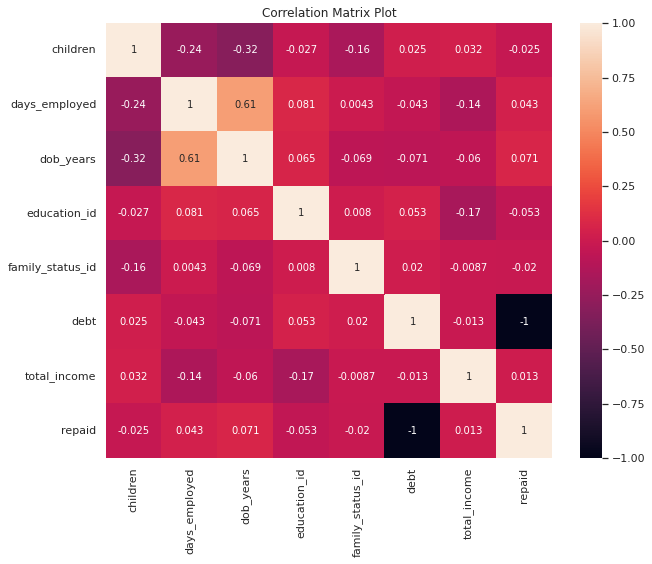

In [130]:
# correlation matrix 
from IPython.core.pylabtools import figsize
figsize(10, 8)

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

Text(0.5, 1.0, 'Corr between having kids and repaying loans on time')

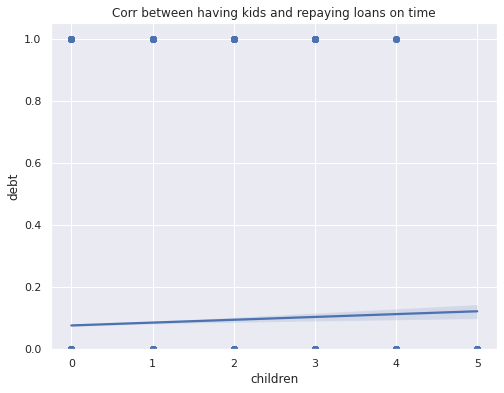

In [131]:
# repaying loan dependency on having kids 
figsize(8, 6)
sns.regplot(x='children', y='debt', data=data)
plt.ylim(0,)
plt.title('Corr between having kids and repaying loans on time')

It is clear from the graph that the relationship between having kids and repaying loans is linear. correlation factor of about 0.025, this shows a vey weak correlation, it it not possible to really deduce the effect of having kids on debt payment by solely making deductions from their correlation. Thus probe further using other techniques

In [132]:
table1 = data.pivot_table(index='children', values='debt', aggfunc='mean')
table1

,debt
children,
0,0.075263
1,0.092547
2,0.094542
3,0.081818
4,0.097561
5,0.000000


Text(0.5, 1.0, 'debt vs number of children')

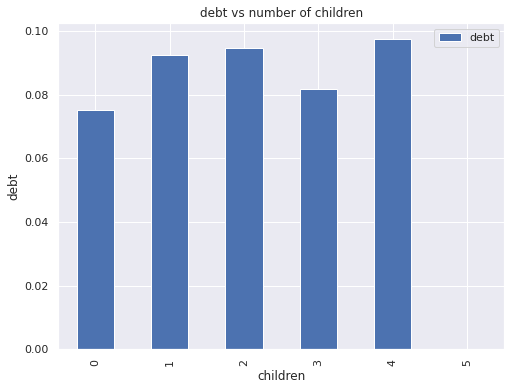

In [133]:
# plot of debt vs number of children
sns.set()
table1 .plot(kind= 'bar')
plt.ylabel('debt')
plt.title('debt vs number of children')

**Conclusion**




We can see from the visualization that generally, clients with higher number of chlidren tends to incur the most debt. this would logically make sense as having a lot of kids puts pressure on clients finances.

**Investigating the correlation between family status and paying back on time**

In [134]:
table2= pd.pivot_table(data, index = 'children', columns= 'family_status', values = 'debt', aggfunc='mean')
table2

family_status,civil partnership,divorced,married,unmarried,widow,widower
children,,,,,,
0,0.083760,0.069797,0.068961,0.092633,0.053416,0.217391
1,0.120159,0.070064,0.082341,0.115721,0.078947,0.200000
2,0.087464,0.086420,0.094586,0.120000,0.187500,0.000000
3,0.142857,0.090909,0.068273,0.125000,0.000000,NaN
4,0.000000,0.000000,0.103448,0.500000,0.000000,NaN
5,0.000000,NaN,0.000000,NaN,NaN,NaN


Text(0.5, 1.0, 'debt vs number of children with family status')

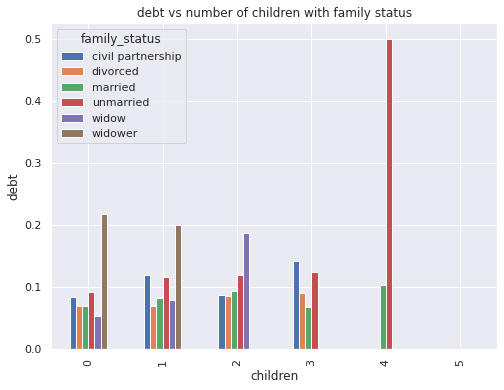

In [135]:
# a plot of debt vs number of children with family status consideration
sns.set()
table2.plot(kind= 'bar')
plt.ylabel('debt')
plt.title('debt vs number of children with family status')

**Conclusion**


Based on the above plot, it can be seen that unmarried clinets with about 4 kids have a higher tendency of defaulting payment than any other category

**Investigating the correlation between income level and paying back on time**

Text(0.5, 1.0, 'Corr between total income and repaying loans on time')

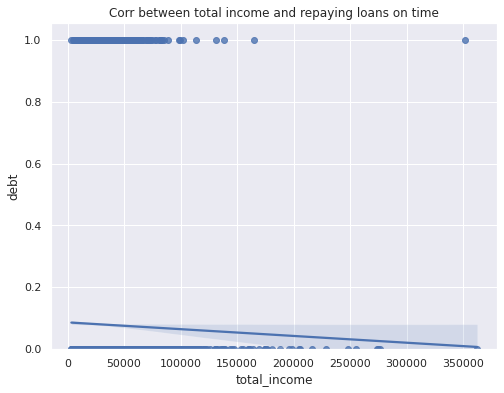

In [136]:
# repaying loan dependency on having kids 
figsize(8, 6)
sns.regplot(x='total_income', y='debt', data=data)
plt.ylim(0,)
plt.title('Corr between total income and repaying loans on time')

Again by looking at the correlation matrix plot, and the dependency plot above, we can see that an inverse linear relationship exist between the total income of a client and the loan repayment with a correlation of about -0.013. the higher the total income of a client, the lower chances of incurring debt. Again this in not ultimately conclusive, since the corraletion is very weak so further investigation is required.

In [137]:
table3 = data.pivot_table(index='debt', values = 'total_income')
table3

,total_income
debt,
0,26510.201119
1,25785.423673


Text(0.5, 1.0, 'Plot of total income vs debt')

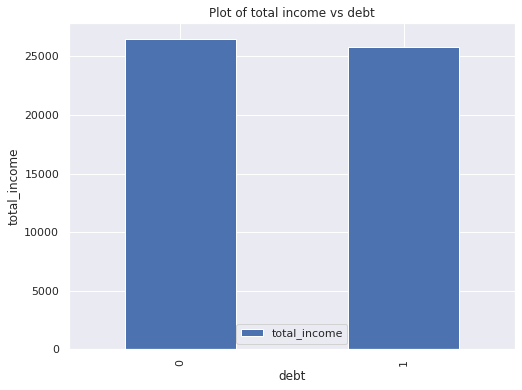

In [138]:

# plot of total income vs debt
sns.set()
table3.plot(kind= 'bar')
plt.ylabel('total_income')
plt.title('Plot of total income vs debt')

**Conclusion**






Drawing conclusion from the visualization seems impossible, as the relationship between total income and debt is still not clear



**How the credit purpose affect the default rate**

In [139]:
# Check the percentages for default rate for each credit purpose and analyze them

def get_summaries(row):
    cat = row["income_category"]
    value = inc_counts[inc_counts["income_category"]==cat]["dob_years"].values[0]
    return 100*(row["dob_years"]/value)

income_payments["percentages"] = income_payments.apply(get_summaries, axis=1)
income_payments

,income_category,repaid,dob_years,percentages
0,100000<=income<=300000,False,5,5.154639
1,100000<=income<=300000,True,92,94.845361
2,10000<=income<=30000,False,1247,8.537003
3,10000<=income<=30000,True,13360,91.462997
4,1000<=income<=10000,False,58,6.263499
5,1000<=income<=10000,True,868,93.736501
6,30000<=income<=70000,False,414,7.471576
7,30000<=income<=70000,True,5127,92.528424
8,70000<=income<=100000,False,16,5.714286
9,70000<=income<=100000,True,264,94.285714


In [140]:
table4 = pd.pivot_table(data, index = ['cat_purpose'], values= 'debt', aggfunc = ['mean'])
table4

,mean
,debt
cat_purpose,
car,0.093590
real_estate,0.071558
university,0.085483
wedding,0.080069


Text(0.5, 1.0, 'Plot of debt vs purpose')

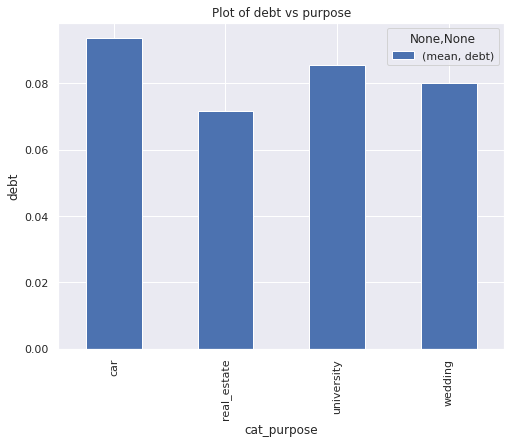

In [141]:
# plot of purpose category vs debt
sns.set()
table4.plot(kind= 'bar')
plt.ylabel('debt')
plt.title('Plot of debt vs purpose')

**conclusion**


The distribution above shows that clients whose reason for taking the loan is related to housing have the highet tendency of paying back the load. Clients that take the lon because they want to buy a new car have the lowest tendency of paying back, followed by clients that need the loan to pay for university fees. 
This analysis kind of makes sense. Generally, the value of real estate tends to appreciate with time as that of luxury cars depreciate, thus making real estate a better chioce mto invest in, and generates income faster for loan repayment .
Also=, clients that need the loan for fees payment may usually be college studients that are currently not working and thus therefore it will be very difficult to pay on time. 

# General Conclusion 




This project was about preparing a report for a bank’s loan division. Finding out if a customer’s marital status and number of children have an impact on whether they will default on a loan. 
To be able to do this analysis, we carried out some data preprocessing on the data provided by our client. This invoved cleanig the data, removing duplicates, replacing missing values in the data, type conversion of some features of the data, and categorizing other features for analysis. Exloratory data analysis was also conducted using the pivot table to gain data insight.

Based on these analysis, we realized that: 

1. generally individuals  with higher number of chlidren tends to incur the most debt or have the highest probability of defaulting payment of debt on time. Thus people with kids are more likey to default loan repayment.



2. unmarried people with about 4 kids have a higher tendency of defaulting payment than any other category. Also despite being uumarried with zero kids, there is a higher chance of defaulting loan than people who fall in the  married, divorced or widow category. Also there is a cosiderably high probability of widowers defaulting payment. But overall, unmarried people default loan payment the most.



3. the relationship or correlation between income level and defaulting on loan payment is close to non-existent.



4. The likelihood of default on loans requested for school and car purchases is high. More people than any other category make their payments on time when applying for a loan to buy a house.